공공 데이터 포탈에서  '한국도로공사_대구경북권 톨게이트 진출입 일교통량'을 검색.
상세 정보에서 한국도로 공사링크를 제공.
링크를 따라간 후  집계주기 1일, 분기 : 2023년 4분기 파일을 다운로드 

1. 집계일자, 영업소명, 입출구명, TCS하이패스명, 총교통량을 제외한 나머지 컬럼 삭제
2. 2023년 10월의 각 영업소별 총 교통량을 막대 그래프로 출력

In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
matplotlib.rcParams['font.family'] = 'AppleGothic'  # 한글 폰트
matplotlib.rcParams['axes.unicode_minus'] = False

In [4]:
df = pd.read_csv('./input/TCS_대구경북권톨게이트진출입일교통량_1일_분기_2023_4qt', encoding='cp949')
df.head()

,집계일자,영업소코드,영업소명,입출구구분코드,입출구명,TCS하이패스구분코드,TCS하이패스명,고속도로운영기관구분코드,고속도로운영기관명,영업형태구분코드,영업형태명,1종교통량,2종교통량,3종교통량,4종교통량,5종교통량,6종교통량,총교통량
0,2023-10-01,203,가산,0,입구,1,TCS,0,한국도로공사,0,폐쇄식,1045,2,9,2,2,4,1064
1,2023-10-01,203,가산,0,입구,2,hi-pass,0,한국도로공사,0,폐쇄식,12150,50,59,44,32,355,12690
2,2023-10-01,203,가산,1,출구,1,TCS,0,한국도로공사,0,폐쇄식,889,2,7,5,4,127,1034
3,2023-10-01,203,가산,1,출구,2,hi-pass,0,한국도로공사,0,폐쇄식,8670,56,31,21,18,250,9046
4,2023-10-01,274,가조,0,입구,1,TCS,0,한국도로공사,0,폐쇄식,292,0,0,1,0,3,296


In [5]:
# 집계일자, 영업소명, 입출구명, TCS하이패스명, 총교통량을 제외한 나머지 컬럼 삭제
df1 = df[['집계일자', '영업소명', '입출구명', 'TCS하이패스명', '총교통량']]
df1.head()

,집계일자,영업소명,입출구명,TCS하이패스명,총교통량
0,2023-10-01,가산,입구,TCS,1064
1,2023-10-01,가산,입구,hi-pass,12690
2,2023-10-01,가산,출구,TCS,1034
3,2023-10-01,가산,출구,hi-pass,9046
4,2023-10-01,가조,입구,TCS,296


In [6]:
# 2023년 10월의 각 영업소별 총 교통량을 막대 그래프로 출력
df2 = df1[df1['집계일자'] == '2023-10-01']
df2.tail()

,집계일자,영업소명,입출구명,TCS하이패스명,총교통량
229,2023-10-01,해인사,출구,hi-pass,4240
230,2023-10-01,화원옥포,입구,TCS,1246
231,2023-10-01,화원옥포,입구,hi-pass,12197
232,2023-10-01,화원옥포,출구,TCS,1201
233,2023-10-01,화원옥포,출구,hi-pass,11591


In [7]:
df3 = df2.groupby('영업소명', as_index=False).agg(n=('총교통량', 'sum'))
df3.tail()

,영업소명,n
55,포항,57450
56,풍기,21851
57,함양,9126
58,해인사,9732
59,화원옥포,26235


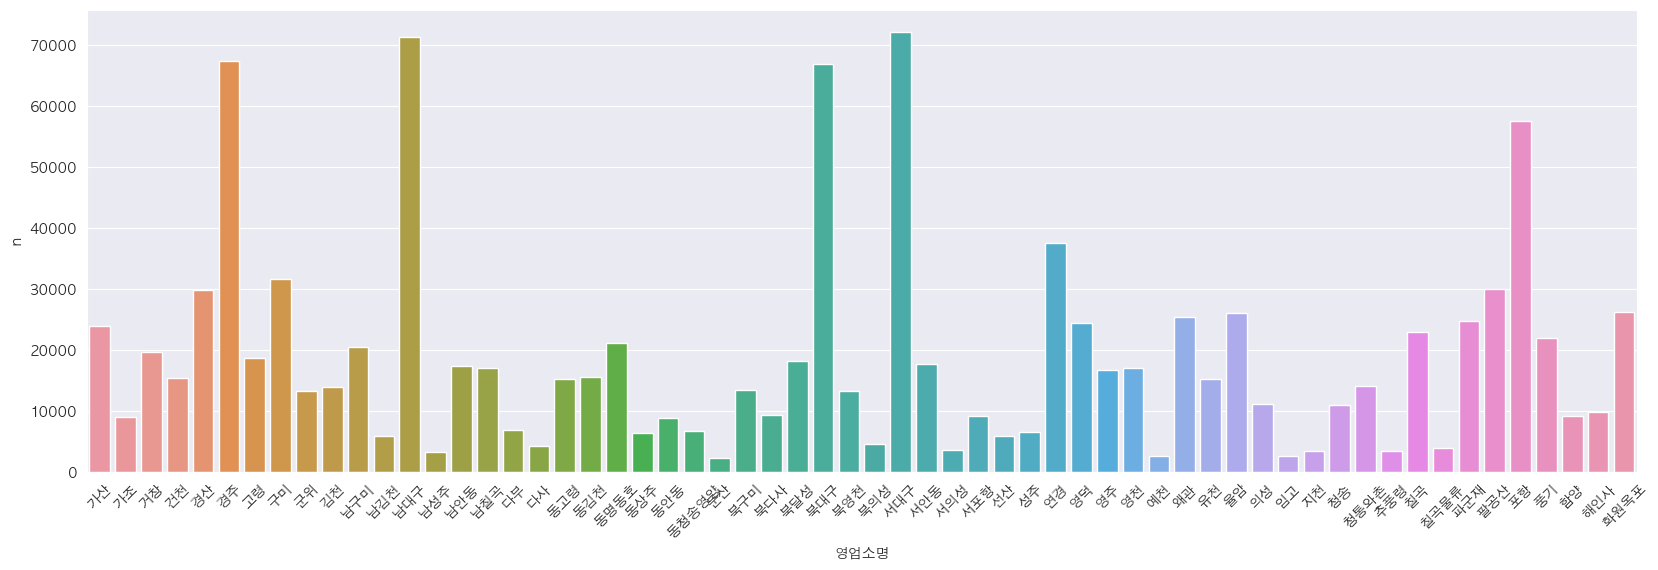

In [10]:
plt.figure(figsize=(20, 6))
plt.xticks(rotation=45)
sns.barplot(data=df3, x='영업소명', y='n')
plt.show()